# 🧪 Feature Engineering & Selection

This notebook performs feature selection, dimensionality reduction, and correlation analysis on threat detection datasets.


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.feature_selection import SelectKBest, f_classif, chi2
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


In [2]:
df = pd.read_csv('../data/processed/NSL-KDD99/KDDTrain+_cleaned.csv')  # or CIC-IDS-2017
X = df.drop(columns=['label', 'difficulty'], errors='ignore')
y = df['label']

# Encode labels if categorical
y = pd.factorize(y)[0]

# One-hot encode categorical features
X = pd.get_dummies(X)


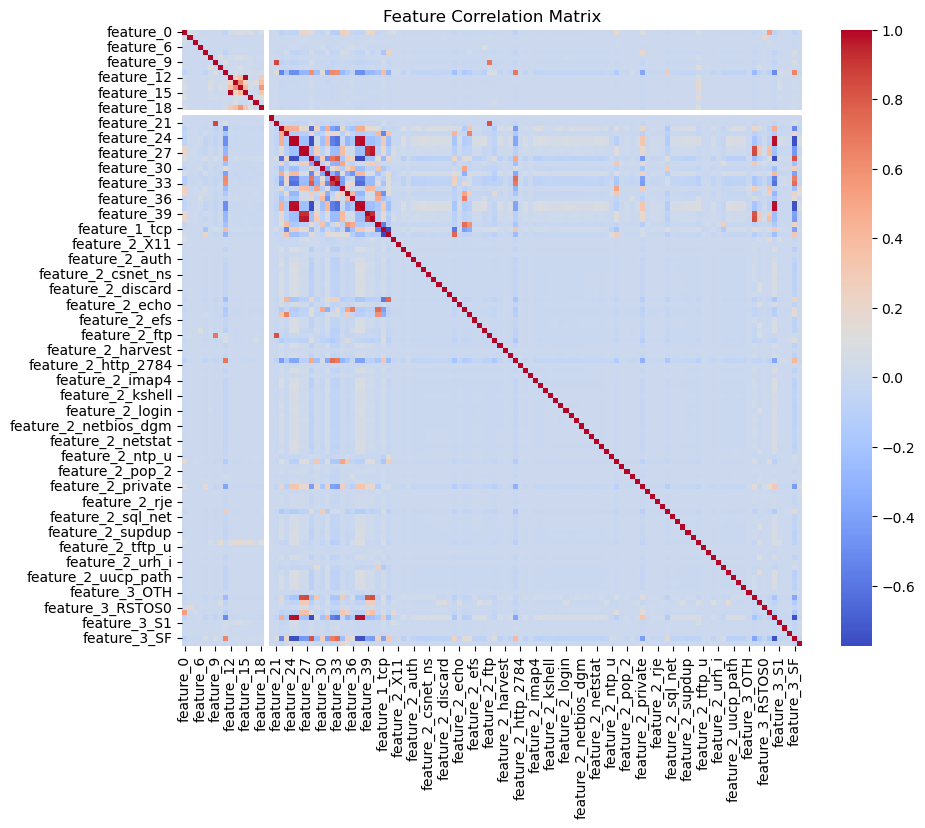

In [3]:
plt.figure(figsize=(10, 8))
corr = X.corr()
sns.heatmap(corr, cmap='coolwarm', cbar=True)
plt.title('Feature Correlation Matrix')
plt.show()


In [4]:
skb = SelectKBest(score_func=f_classif, k=10)
X_new = skb.fit_transform(X, y)
top_features = X.columns[skb.get_support()]
print("Top 10 Features:", top_features.tolist())


Top 10 Features: ['feature_7', 'feature_24', 'feature_25', 'feature_28', 'feature_37', 'feature_38', 'feature_1_icmp', 'feature_2_ecr_i', 'feature_3_S0', 'feature_3_SF']


d:\Anaconda\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [16] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
d:\Anaconda\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


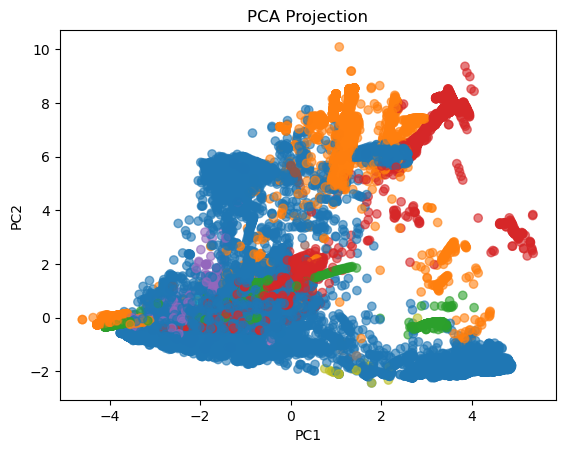

In [5]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='tab10', alpha=0.6)
plt.title('PCA Projection')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()
